In [1]:
%matplotlib inline

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/version/0.15.2/cookbook.html#cookbook)

Customarily, we import as follows:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Object Creation

### Series

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/version/0.15.2/dsintro.html#dsintro)

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [11]:
s = pd.Series([1,3,5,np.nan,6,8])
t = pd.Series([-1,4,-5,5,6,18])
u = pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

In [7]:
s*2

0     2.0
1     6.0
2    10.0
3     NaN
4    12.0
5    16.0
dtype: float64

In [8]:
s + t

0     0.0
1     7.0
2     0.0
3     NaN
4    12.0
5    26.0
dtype: float64

In [9]:
s*t

0     -1.0
1     12.0
2    -25.0
3      NaN
4     36.0
5    144.0
dtype: float64

In [10]:
np.exp(s)

0       2.718282
1      20.085537
2     148.413159
3            NaN
4     403.428793
5    2980.957987
dtype: float64

In [12]:
s+u

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
dtype: float64

### Dataframe

a dataframe is 2d with labels, a bit like a spread sheet.

In [16]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)

In [17]:
print(df)

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0


In [18]:
df + df

,one,two
a,2.0,2.0
b,4.0,4.0
c,6.0,6.0
d,NaN,8.0


In [19]:
df ** 2

,one,two
a,1.0,1.0
b,4.0,4.0
c,9.0,9.0
d,NaN,16.0


In [20]:
np.exp(df)

,one,two
a,2.718282,2.718282
b,7.389056,7.389056
c,20.085537,20.085537
d,NaN,54.598150


So that seems pretty cool so far.

In [21]:
df1 = pd.DataFrame(d, index=['d', 'b', 'a'])
df2 = pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

In [22]:
df1

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [23]:
df2

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [24]:
df1 + df2

,one,three,two
d,NaN,NaN,8.0
b,NaN,NaN,4.0
a,NaN,NaN,2.0


In [25]:
d2 = {'one' : [1., 2., 3., 4.],
      'two' : [4., 3., 2., 1.]}
df3 = pd.DataFrame(d2)

In [27]:
df3

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [28]:
df1 + df3

,one,two
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
a,NaN,NaN
b,NaN,NaN
d,NaN,NaN


In [29]:
df1['one']

d    NaN
b    2.0
a    1.0
Name: one, dtype: float64

In [30]:
df['three'] = df['one'] + df['two']
df

,one,two,three
a,1.0,1.0,2.0
b,2.0,2.0,4.0
c,3.0,3.0,6.0
d,NaN,4.0,NaN


In [32]:
df['foo'] = 'bar'
df

,one,two,three,foo
a,1.0,1.0,2.0,bar
b,2.0,2.0,4.0,bar
c,3.0,3.0,6.0,bar
d,NaN,4.0,NaN,bar


In [35]:
df.insert(1, 'four', [4,5,7,9])
df

,one,four,two,three,foo
a,1.0,4,1.0,2.0,bar
b,2.0,5,2.0,4.0,bar
c,3.0,7,3.0,6.0,bar
d,NaN,9,4.0,NaN,bar


Row selection, for example, returns a Series whose index is the columns of the DataFrame:

In [37]:
df.loc['b']

one        2
four       5
two        2
three      4
foo      bar
Name: b, dtype: object

##### The transpose

The transpose is intuitive.

In [38]:
df.T

,a,b,c,d
one,1,2,3,NaN
four,4,5,7,9
two,1,2,3,4
three,2,4,6,NaN
foo,bar,bar,bar,bar


##### The dot product

It seems as expected

In [40]:
df1.dot(df3.T)

,0,1,2,3
d,NaN,NaN,NaN,NaN
b,10.0,10.0,10.0,10.0
a,5.0,5.0,5.0,5.0


##### a biggie

In [47]:
randn = np.random.randn

In [52]:
df4 = pd.DataFrame(randn(40,40))

#### 

In [54]:
df4.to_string

<bound method DataFrame.to_string of           0         1         2         3         4         5         6   \
0   0.164484 -0.328710  1.811506 -0.092897  0.118674 -0.656289 -1.078476   
1  -0.949688  0.474824  1.389585 -1.197030  0.408334 -2.267164  0.507821   
2   0.296714  1.210053  0.022849 -0.369344 -0.094007  0.870101  1.390516   
3  -0.184006  1.106400  0.658663 -1.726982 -0.315129 -0.847858  0.059029   
4  -0.475565 -0.248632  1.389528  0.584527  0.441279  1.665069 -1.968964   
5  -1.158583  0.420265  1.743985 -1.937895  0.380366 -0.460759 -0.562593   
6   0.542077  0.490581 -1.077873 -0.677334  0.215326 -1.218229 -0.224205   
7  -0.355129 -1.035070  0.978514 -2.699873 -0.404275 -0.354681  0.035351   
8  -0.768921 -0.991555 -0.500606 -1.250419  0.743006 -0.827212  0.387398   
9  -0.722977  1.071354  0.349261 -1.595363  1.256779 -0.585442 -0.906441   
10 -0.150827 -1.605391  0.619899 -1.013446  1.502238 -0.680362 -0.428548   
11 -1.481855  0.266715  1.664408  0.975441 -0.67145

##### date ranges

some times data is related to time

In [55]:
dates = pd.date_range('20130101',periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [56]:
df5 = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df5

,A,B,C,D
2013-01-01,0.906019,-0.736503,0.511337,-0.781525
2013-01-02,0.632021,1.255986,-0.853858,1.806169
2013-01-03,-0.875863,1.033233,0.322443,-1.103165
2013-01-04,0.683103,0.652741,-1.187414,-1.000669
2013-01-05,-0.290872,-0.495376,-1.649469,0.087132
2013-01-06,-0.929804,0.911393,0.954709,0.805476


In [58]:
df6 = pd.DataFrame({ 'A' : 1.,
  'B' : [pd.Timestamp('20130102'),pd.Timestamp('20130602'),pd.Timestamp('20140102'),pd.Timestamp('20150102')],
  'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
  'D' : np.array([3] * 4,dtype='int32'),
  'E' : pd.Categorical(["test","train","test","train"]),
  'F' : 'foo' })
df6

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-06-02,1.0,3,train,foo
2,1.0,2014-01-02,1.0,3,test,foo
3,1.0,2015-01-02,1.0,3,train,foo


And list the data types

In [59]:
df6.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

And get counts by _row_

In [62]:
df6.count()['A']

4

And you can [write it to a CSV](https://stackoverflow.com/questions/23231605/convert-pandas-dataframe-to-csv-string).

In [64]:
import StringIO
s = StringIO.StringIO()
df.to_csv(s, sep='\t', encoding='utf-8', index=False)
print(s.getvalue())

one	four	two	three	foo
1.0	4	1.0	2.0	bar
2.0	5	2.0	4.0	bar
3.0	7	3.0	6.0	bar
	9	4.0		bar



#### viewing stuff

In [67]:
df.head(2)

,one,four,two,three,foo
a,1.0,4,1.0,2.0,bar
b,2.0,5,2.0,4.0,bar


In [66]:
df.tail(2)

,one,four,two,three,foo
c,3.0,7,3.0,6.0,bar
d,NaN,9,4.0,NaN,bar


In [68]:
df.columns

Index([u'one', u'four', u'two', u'three', u'foo'], dtype='object')

In [69]:
df.values

array([[1.0, 4, 1.0, 2.0, 'bar'],
       [2.0, 5, 2.0, 4.0, 'bar'],
       [3.0, 7, 3.0, 6.0, 'bar'],
       [nan, 9, 4.0, nan, 'bar']], dtype=object)

In [71]:
#cool
pd.DataFrame(df.values)

,0,1,2,3,4
0,1,4,1,2,bar
1,2,5,2,4,bar
2,3,7,3,6,bar
3,NaN,9,4,NaN,bar


`decribe` gives a quick summary

In [72]:
df.describe()

,one,four,two,three
count,3.0,4.000000,4.000000,3.0
mean,2.0,6.250000,2.500000,4.0
std,1.0,2.217356,1.290994,2.0
min,1.0,4.000000,1.000000,2.0
25%,1.5,4.750000,1.750000,3.0
50%,2.0,6.000000,2.500000,4.0
75%,2.5,7.500000,3.250000,5.0
max,3.0,9.000000,4.000000,6.0


You can even sort:

In [75]:
df.sort_index(axis=0, ascending=False)

,one,four,two,three,foo
d,NaN,9,4.0,NaN,bar
c,3.0,7,3.0,6.0,bar
b,2.0,5,2.0,4.0,bar
a,1.0,4,1.0,2.0,bar


indexing (like a where clause 😀):
    

In [81]:
df[df > 2]

,one,four,two,three,foo
a,NaN,4,NaN,NaN,bar
b,NaN,5,NaN,4.0,bar
c,3.0,7,3.0,6.0,bar
d,NaN,9,4.0,NaN,bar


filtering by values:

In [80]:
df7 = df.copy()
df7['E']=['one', 'one','two','three']
df7

,one,four,two,three,foo,E
a,1.0,4,1.0,2.0,bar,one
b,2.0,5,2.0,4.0,bar,one
c,3.0,7,3.0,6.0,bar,two
d,NaN,9,4.0,NaN,bar,three


In [83]:
# I know it looks like some trigonometry reference, but it's saying "is in"
df7[df7['E'].isin(['two','four'])]

,one,four,two,three,foo,E
c,3.0,7,3.0,6.0,bar,two


## Stats


In [84]:
df7.mean()

one      2.00
four     6.25
two      2.50
three    4.00
dtype: float64

In [85]:
df7.mean(1)

a    2.00
b    3.25
c    4.75
d    6.50
dtype: float64

### Applying functions

you can do piece meal:

In [88]:
df8 = pd.DataFrame(pd.Series([-1,4,-5,5,6,18]))
df8.apply(lambda x: x - 5)

,0
0,-6
1,-1
2,-10
3,0
4,1
5,13


Or aggregates:

In [93]:
df8.apply(lambda x: (x.min(), x.max()))

0    (-5, 18)
dtype: object

### Histogramming

In [94]:
s2 = pd.Series(np.random.randint(0,7,size=10))
s2.value_counts()

6    3
3    2
2    2
5    1
1    1
0    1
dtype: int64

In [97]:
df8.apply(lambda x: x.value_counts())

,0
6,1
5,1
-5,1
4,1
18,1
-1,1


Let's see a [histogram](https://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html) of the value counts: 

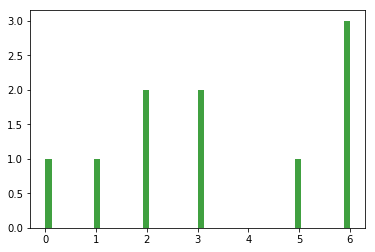

In [125]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(s2, 50, facecolor='green', alpha=0.75)
plt.show()

In [123]:
s2

0    6
1    6
2    1
3    2
4    3
5    3
6    5
7    2
8    0
9    6
dtype: int64

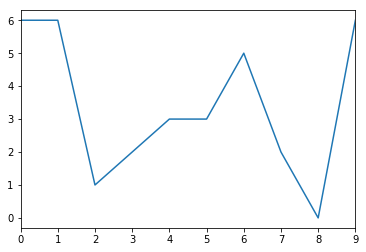

In [122]:
s2.plot()

### SQL style joins

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/version/0.15.2/merging.html#merging-join)

In [101]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [104]:
years = pd.DataFrame({'key' : ['Jurassic Park', 'Fahrenheit 911'], 'year':[1994, 2002]})
directors = pd.DataFrame({'key' : ['Jurassic Park', 'Fahrenheit 911'], 'director': ['Stephen Spielberg', 'Michael Moore']})
gross = pd.DataFrame({'key' : ['Jurassic Park', 'Fahrenheit 911'], 'gross': [500000000, 5000000]})
pd.merge(pd.merge(years, directors, on="key" ), gross, on="key")

,key,year,director,gross
0,Jurassic Park,1994,Stephen Spielberg,500000000
1,Fahrenheit 911,2002,Michael Moore,5000000


### Grouping

You can group things

In [105]:
gp = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
         'foo', 'bar', 'foo', 'foo'],
     'B' : ['one', 'one', 'two', 'three',
           'two', 'two', 'one', 'three'],
     'C' : np.random.randn(8),
     'D' : np.random.randn(8)})

gp.groupby('A').sum()

,C,D
A,,
bar,-0.083321,0.952423
foo,3.089033,4.184733


In [110]:
gp.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.165883 -0.080020
    three -0.477544 -0.154288
    two    0.228341  1.186731
foo one    0.686629  1.201078
    three -0.021015  1.004291
    two    2.423419  1.979364

## Reshaping


In [112]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                      'foo', 'foo', 'qux', 'qux'],
                     ['one', 'two', 'one', 'two',
                      'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [114]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[[u'bar', u'baz', u'foo', u'qux'], [u'one', u'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'first', u'second'])

In [115]:
df9 = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df9

A         B
first second                    
bar   one     1.323609 -1.052348
      two     0.436383  0.076577
baz   one     0.281903 -0.051855
      two     1.949812  0.076048
foo   one     0.874971 -0.294205
      two     0.636548 -0.932648
qux   one     0.984725 -0.232807
      two     2.096237 -2.060348

In [116]:
df9[:4]

A         B
first second                    
bar   one     1.323609 -1.052348
      two     0.436383  0.076577
baz   one     0.281903 -0.051855
      two     1.949812  0.076048

In [117]:
df9[:4].stack()

first  second   
bar    one     A    1.323609
               B   -1.052348
       two     A    0.436383
               B    0.076577
baz    one     A    0.281903
               B   -0.051855
       two     A    1.949812
               B    0.076048
dtype: float64

In [118]:
df9[:4].stack().unstack()

A         B
first second                    
bar   one     1.323609 -1.052348
      two     0.436383  0.076577
baz   one     0.281903 -0.051855
      two     1.949812  0.076048

### pivot tables

see the [pivot tables](http://pandas.pydata.org/pandas-docs/version/0.15.2/reshaping.html#reshaping-pivot)

In [119]:
df10= pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                    'B' : ['A', 'B', 'C'] * 4,
                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)})
df10

,A,B,C,D,E
0,one,A,foo,0.513916,1.153582
1,one,B,foo,1.807044,0.301227
2,two,C,foo,0.246692,-0.550898
3,three,A,bar,-1.626535,-1.115872
4,one,B,bar,-1.748959,1.202003
5,one,C,bar,-0.153910,-0.268345
6,two,A,foo,1.280656,-0.483351
7,three,B,foo,0.542429,1.560663
8,one,C,foo,1.300888,-1.176014
9,one,A,bar,-1.197701,1.036476


In [121]:
pd.pivot_table(df10, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.197701  0.513916
      B -1.748959  1.807044
      C -0.153910  1.300888
three A -1.626535       NaN
      B       NaN  0.542429
      C -0.376976       NaN
two   A       NaN  1.280656
      B  0.046957       NaN
      C       NaN  0.246692

#### More plotting

from [plotting](http://pandas.pydata.org/pandas-docs/version/0.15.2/visualization.html#visualization)

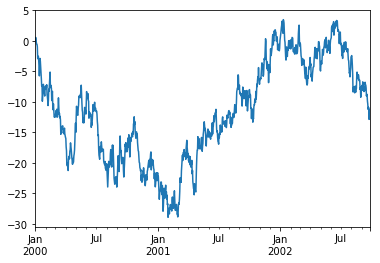

In [130]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

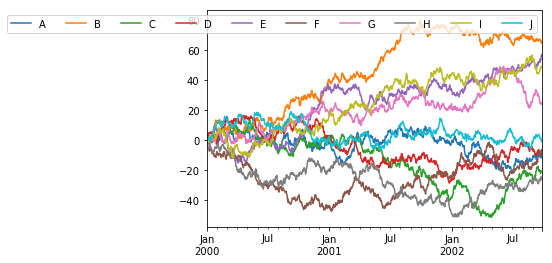

In [137]:
df = pd.DataFrame(np.random.randn(1000, 10), index=ts.index,
                   columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])

df = df.cumsum()

plt.figure(); df.plot(); plt.legend(loc='best', ncol=10)


More info about any of these topics can be found on the [pandas getting started guide](http://pandas.pydata.org/pandas-docs/version/0.15.2/10min.html).